## importing required libraries


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
url="https://raw.githubusercontent.com/lumidenoir/Project2022/assignment/Applications_Of_Reinforcement_Learning/Assignment-2/210299_krishna%20dantu/CarPrice_Assignment.csv"
given=[[190.9,70.3,54.9,183,3.64,123]]
alpha=0.01
cycle=5000


### split


In [157]:
def splitting(mat,rat):
    training=mat.iloc[0:(int((mat.shape[0])*rat))].values
    testing=mat.iloc[(int((mat.shape[0])*rat)):mat.shape[0]].values
    return training,testing


### stack

In [158]:
def concate(mat):
    mat_stack=np.concatenate((np.ones((mat.shape[0],1)),mat), axis=1)
    return mat_stack

### gradient

In [159]:
def gradient(X,Y,Theta,cycle,alpha):
    cost=np.zeros(cycle)
    for i in range(cycle):
        error=((X.dot(Theta.T))-Y)
        multiplyerror=(error.T@X)
        Theta=Theta-(alpha/X.shape[1])*multiplyerror
        cost[i]=Cost(X,Y,Theta)
    return Theta,cost 
     

### Cost

In [160]:
def Cost(X,Y,Theta):
    return 1/(2*X.shape[0])*(np.sum(((X.dot(Theta.T))-Y)**2))

### normalization

In [161]:
def normalization(mat):
    fac1=mat.min()
    fac2=mat.max()-mat.min()
    mat_nor=(mat-fac1)/(fac2)
    return mat_nor, fac1,fac2

### standard normalization

In [162]:
def snormalization(mat):
    return (mat-mat.mean())/mat.std() 

### prediction

In [163]:
def prediction(X,Theta):
    return X.dot(Theta.T)

### r2

In [164]:
def r2(Ypr,Y):
    return 1- {(np.sum((Ypr-Y)**2))/(np.sum((Y-Y.mean())**2))}

### import data

In [165]:
my_data=pd.read_csv(url, skipinitialspace=True, usecols=['carlength','carwidth','carheight','enginesize','stroke','horsepower'])
price_data=pd.read_csv(url,skipinitialspace=True,usecols=['price'])
Theta=np.zeros((1,my_data.shape[1]+1))

### 80:20


In [166]:
My_data,fac1,fac2=normalization(my_data)
Price_data,fac3,fac4=normalization(price_data)


train_data,test_data=splitting(My_data,0.8)
train_price,test_price=splitting(Price_data,0.8)

#  ,calculate gradient and stacking a column

In [167]:

train_data=concate(train_data)
test_data=concate(test_data)

Theta,Cost=gradient(train_data,train_price,Theta,cycle,alpha)


### graph

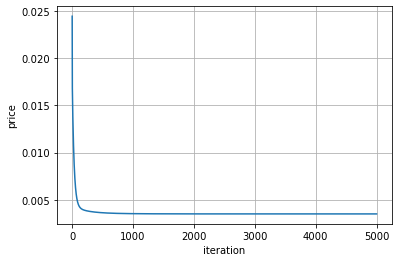

In [168]:
plt.plot(range(cycle),Cost,label="normal")
plt.xlabel('iteration')
plt.ylabel('price')
plt.grid()
plt.show()

### predicting price

In [169]:
given_nor=concate((given-np.array(fac1))/np.array(fac2))
given_predict=prediction(given_nor,Theta)
predict_convert=given_predict[0,0]*fac4+fac3
print("PRICE:",float(predict_convert))

PRICE: 22811.753940809955
